<img src="https://github.com/jmcalvomartin/Quantum-Data-Encoding-QML/blob/main/Logo_VIU.png?raw=True" width="300">

# Métodos de transformación de datos clásicos a datos cuánticos
### TFM : Codificación de los datos para la aplicación de modelos de Aprendizaje Automático en computación cuántica.
### Anexo 1
#### Autor: Jorge Calvo Martín

## Transformación de datos usando amplitud

La técnica de amplitud es una forma de codificar información clásica en un estado cuántico utilizando amplitudes complejas. En esta técnica, cada dato clásico se representa por un estado cuántico con una amplitud asociada. A continuación, se explica paso a paso cómo se utiliza la técnica de amplitud para transformar datos clásicos a datos cuánticos, y se ilustrará con un ejemplo.

***Transformación de datos usando amplitud**

* Paso 1: Preparar los datos clásicos
Se selecciona un conjunto de datos clásicos que se quiere transformar en datos cuánticos. Por ejemplo, se consideran los siguientes datos clásicos: [0.2, 0.5, 0.8, 0.3].

* Paso 2: Normalizar los datos
Antes de realizar la codificación de amplitud, es común normalizar los datos para que tengan una longitud de 1. Esto se hace dividiendo cada valor por la norma de los datos. En el ejemplo, la norma es $ \sqrt{0.2^2 + 0.5^2 + 0.8^2 + 0.3^2}  = 1.0186 $. Por lo tanto, se normalizan los datos dividiendo cada valor por 1.0186: [0.196, 0.491, 0.785, 0.294].

* Paso 3: Crear un circuito cuántico
Para codificar los datos normalizados en un estado cuántico, se crea un circuito cuántico con qubits suficientes para representar los datos. En este caso, se utilizan 2 qubits, ya que se tienen 4 datos normalizados. 

* Paso 4: Codificación de amplitud
La codificación de amplitud implica inicializar los qubits con las amplitudes asociadas a cada dato. En el ejemplo, se asignan las amplitudes normalizadas a los qubits utilizando la instrucción **initialize** del circuito cuántico.

* Paso 5: Visualización del estado cuántico
Para visualizar el estado cuántico resultante, se puede utilizar la **esfera de Bloch**. Esto proporciona una representación geométrica del estado cuántico en un espacio tridimensional. 

#### Ilustración del ejemplo usando un conjunto de datos reales : Dataset Iris

Datos a transformar de la muestra:  [5.1 3.5 1.4 0.2]
Número de qubits necesarios:  2
Datos normalizados:  [0.80377277 0.55160877 0.22064351 0.0315205 ]
Statevector([0.80377277+0.j, 0.55160877+0.j, 0.22064351+0.j,
             0.0315205 +0.j],
            dims=(2, 2))


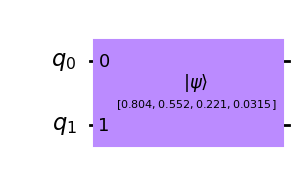

In [2]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from sklearn.datasets import load_iris

# Ejemplo real
# Datos clásicos
iris = load_iris()
#data=np.rint(iris.data[20]).astype("int") #Redondeando los valores
data=iris.data[0] #sin redondear los valores
print("Datos a transformar de la muestra: ", data)


def classical_to_quantum_amplitude(data):
    
    if np.log2(len(data)) > np.log2(len(data)).round().astype("int"):
        num_qubits=np.log2(len(data)).round().astype("int")+1
    else: num_qubits=np.log2(len(data)).round().astype("int")
    
    print("Número de qubits necesarios: ",num_qubits)
    
    qc = QuantumCircuit(num_qubits)
    
    # Normalizar los datos
    normalized_data = data / np.linalg.norm(data)
    
    print("Datos normalizados: ", normalized_data)
    
    # Codificación de amplitud
    qc.initialize(normalized_data, range(num_qubits))
    
    # Simulación del circuito cuántico
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(qc, simulator).result()
    statevector = result.get_statevector()
    
    return statevector, qc


# Transformación a datos cuánticos utilizando la técnica de la amplitud
quantum_state, qc = classical_to_quantum_amplitude(data)

print(quantum_state)

qc.draw("mpl")


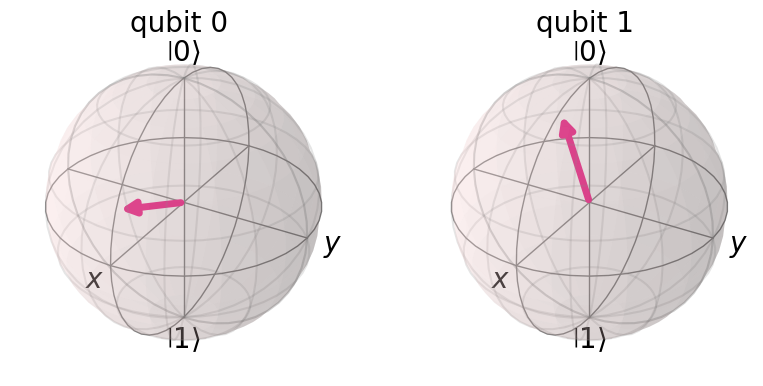

In [22]:
# Visualización en la esfera de Bloch
plot_bloch_multivector(quantum_state)

## Tranformación datos en modo binario
La transformación de datos clásicos a datos cuánticos usando la técnica de transformación en datos binarios es un proceso fundamental en la computación cuántica. Permite codificar información clásica en un estado cuántico, aprovechando las propiedades únicas de los sistemas cuánticos, como la superposición y la interferencia cuántica.

En esta técnica, los datos clásicos se representan mediante secuencias binarias, donde cada bit representa un valor booleano (0 o 1) [1]. Por ejemplo, si tenemos un conjunto de datos con n características, cada dato se puede representar mediante una secuencia binaria de longitud n. Cada bit de la secuencia codifica el valor de una característica específica del dato.

La transformación de datos clásicos a datos cuánticos se realiza asignando un qubit a cada bit de la secuencia binaria. Un qubit es la unidad básica de información en la computación cuántica y puede estar en un estado de superposición, representado por una combinación lineal de los estados base |0> y |1> [2].

La técnica de transformación en datos binarios se basa en asignar el estado |0> al bit 0 y el estado |1> al bit 1 de cada qubit correspondiente. De esta manera, el estado cuántico resultante representa la información clásica codificada en forma de amplitudes cuánticas [3].

Por ejemplo, si tenemos una secuencia binaria "1010", asignaríamos el estado |1> al primer qubit, el estado |0> al segundo qubit, el estado |1> al tercer qubit y el estado |0> al cuarto qubit. El estado cuántico resultante sería una superposición de los estados base de los qubits involucrados.

Es importante destacar que la transformación en datos binarios permite codificar información clásica en un estado cuántico, pero no aprovecha plenamente las capacidades de procesamiento cuántico. Para realizar operaciones y obtener ventajas cuánticas reales, es necesario utilizar algoritmos y puertas cuánticas adecuadas para manipular y procesar el estado cuántico resultante.

En resumen, la transformación de datos clásicos a datos cuánticos mediante la técnica de transformación en datos binarios consiste en asignar estados cuánticos a cada bit de una secuencia binaria, permitiendo representar información clásica en forma de amplitudes cuánticas. Esta transformación sienta las bases para la manipulación y procesamiento posterior de los datos utilizando algoritmos y puertas cuánticas adecuadas.

**Referencias:**
* [1] Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge University Press.
* [2] Preskill, J. (1998). Lecture Notes on Quantum Computation. California Institute of Technology.
* [3] Mermin, N. D. (2007). Quantum Computer Science: An Introduction. Cambridge University Press.


#### Ejemplo real: Dataset Iris
Supongamos que tenemos un conjunto de datos clásicos representados por el dataset **Iris**


| Sepal Length (cm) | Sepal Width (cm) | Petal Length (cm) | Petal Width (cm)
|-------------------|-----------------|-------------------|------------------
| 5.1               | 3.5             | 1.4               | 0.2              
| 4.9               | 3.0             | 1.4               | 0.2              
| 4.7               | 3.2             | 1.3               | 0.2              
| 4.6               | 3.1             | 1.5               | 0.2              


Para transformar estos datos clásicos en datos cuánticos, primero debemos representar cada característica en forma binaria. Utilizaremos la representación binaria de 4 bits para cada característica, ya que tenemos valores que van del 1 al 8 (se han pasado los valores a enteros para facilitar su transformación). Ejemplo con muestra 1

* Sepal Lenght: 5 se representa como 0101 en binario
* Sepal Width: 3 se representa como 0011 en binario
* Petal Lenght: 1 se representa como 0001 en binario
* Petal Width: 0 se representa como 0000 en binario

Ahora, asignaremos un qubit a cada bit de la representación binaria de cada característica. En nuestro caso, necesitamos 16 qubits para representar las 4 características. Utilizaremos la librería Qiskit para realizar esta transformación.

Cada qubit se utiliza para representar un bit específico en la representación binaria de cada característica. En el código, se utiliza la función qc.x() para aplicar una puerta X a los qubits correspondientes cuando el bit es igual a '1'. Esto se hace para asegurar que los qubits tengan el estado |1> en lugar del estado |0> cuando el bit es '1'.

#### Código en Python utilizando Qiskit:

In [8]:
# Ejemplo real
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from sklearn.datasets import load_iris

# Datos clásicos
iris = load_iris()
data=np.rint(iris.data[:4]).astype("int")

#Espacio del array para representar los datos en binario
if np.log2(np.max(data)) > np.log2(np.max(data)).round().astype("int"):
    size=np.log2(np.max(data)).round().astype("int")+1
else: size=np.log2(np.max(data)).round().astype("int")
      
print("Número de bits necesario para representar los datos de cada caracteristica: ",size)

# Transformación en datos binarios
binary_data = []
for sample in data:
    binary_sample = []
    for feature in sample:
        binary_feature = bin(feature)[2:].zfill(size)
        binary_sample.extend(list(binary_feature))
    binary_data.append(binary_sample)
'''
    
# Transformación binaria de los datos
binary_data = []
for i in range(len(data)):
    binary_data.append(format(int(data[i]), '03b'))
'''
    
#Representación binaria
for _ in range (len(binary_data)):
    print("Datos originales:", data[_], "  Datos binarios:", binary_data[_])

# Creación del circuito cuántico
num_qubits = len(binary_data[0])
print("Necesito ",num_qubits," qubits")
qc = QuantumCircuit(num_qubits, num_qubits)

print(qc.draw("mpl"))
      
# Aplicación de la transformación en datos binarios
for sample in binary_data:
    for idx, bit in enumerate(sample):
        #print(idx,bit)
        if bit == '1':
            qc.x(idx)

# Medición de los qubits
qc.measure(range(num_qubits), range(num_qubits))

# Ejecución del circuito en un simulador cuántico
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
statevector=result.get_statevector()
counts = result.get_counts(qc)


print("Resultados:")
print(counts)
#plot_bloch_multivector(statevector)

Número de bits necesario para representar los datos de cada caracteristica:  3
Datos originales: [5 4 1 0]   Datos binarios: ['1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0']
Datos originales: [5 3 1 0]   Datos binarios: ['1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0']
Datos originales: [5 3 1 0]   Datos binarios: ['1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0']
Datos originales: [5 3 2 0]   Datos binarios: ['1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0']
Necesito  12  qubits
Figure(180.108x1120.39)
Resultados:
{'000110111000': 1000}


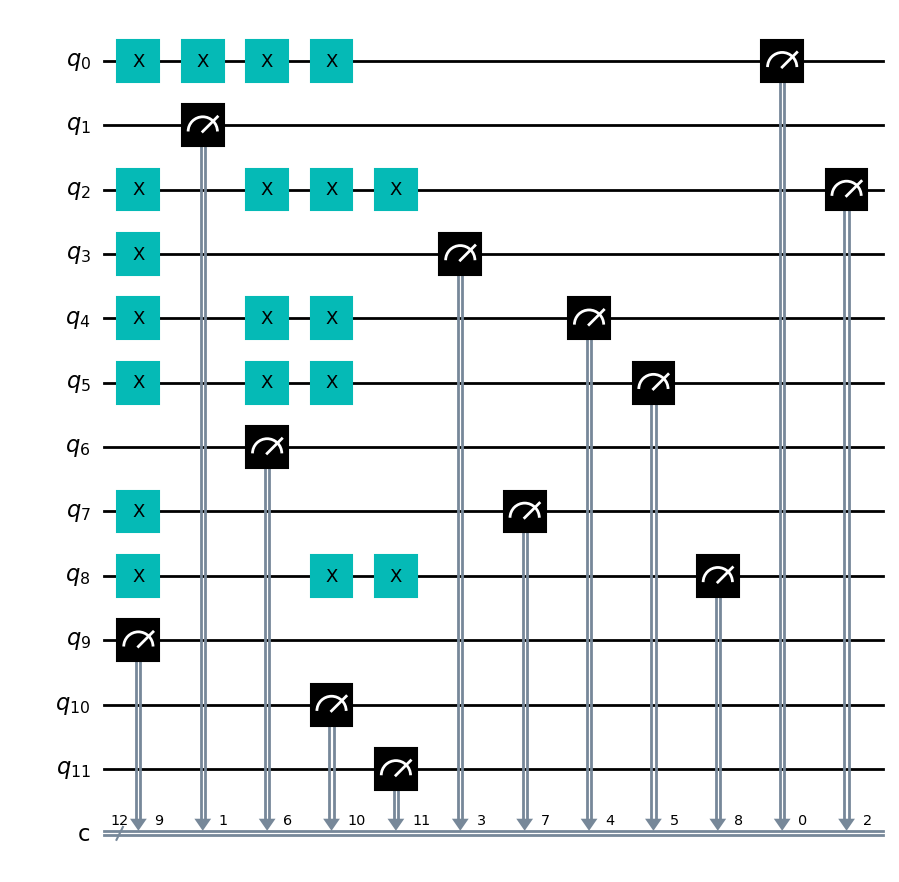

In [9]:
#Dibujo de circuito cuántico
qc.draw("mpl")

## Transformación de datos por desplazamiento de fase
La transformación de datos clásicos a datos cuánticos utilizando la técnica de desplazamiento de fase es un procedimiento fundamental en la computación cuántica. En esta transformación, los datos clásicos se codifican en la fase de un estado cuántico, lo que permite aprovechar las propiedades de superposición y interferencia cuántica para procesar y analizar información de manera más eficiente que en los sistemas clásicos.

El desplazamiento de fase implica modificar la fase de un estado cuántico en función de los valores de los datos clásicos que deseamos codificar. Para comprender mejor este proceso, consideremos un caso concreto: la codificación de un bit clásico en un qubit cuántico.

Un bit clásico puede tomar dos valores: 0 o 1. Para codificar este bit clásico en un qubit cuántico, utilizamos la técnica de desplazamiento de fase. Supongamos que queremos codificar el valor "0". En este caso, no aplicamos ningún cambio en la fase del estado cuántico. Si queremos codificar el valor "1", aplicamos un desplazamiento de fase de π (pi) al estado cuántico.

Matemáticamente, podemos representar un estado cuántico de un qubit como una superposición de dos estados base, |0⟩ y |1⟩:

#### |ψ⟩ = α|0⟩ + β|1⟩

Donde α y β son las amplitudes de probabilidad asociadas a los estados base.

Para codificar el valor "0", mantenemos α igual a 1 y β igual a 0:

#### |ψ⟩ = 1|0⟩ + 0|1⟩

Si queremos codificar el valor "1", aplicamos un desplazamiento de fase de π (pi) al estado |1⟩:

#### |ψ⟩ = 1|0⟩ + e^(iπ)|1⟩

Donde e^(iπ) representa el cambio de fase aplicado al estado |1⟩.

En términos prácticos, la transformación de datos clásicos a cuánticos mediante desplazamiento de fase implica realizar operaciones en un circuito cuántico. Cada qubit del circuito se inicializa en un estado |0⟩ y luego se aplica un desplazamiento de fase apropiado según los valores de los datos clásicos que se desean codificar. Estos desplazamientos de fase se pueden lograr utilizando compuertas cuánticas específicas, como la compuerta de fase (Ry) o la compuerta de rotación (U1), entre otras.

#### Ilustración de un ejemplo de Transformación por desplazamiento de fase usando datos reales: Dataset Iris

Datos a transformar de la muestra:  [5.1 3.5 1.4 0.2]
Número de qubits necesarios para crear el circuito:  2
Fase de desplazamiento:  8.011061266653972
Fase de desplazamiento:  5.497787143782138


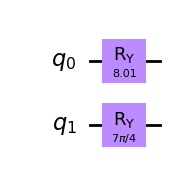

In [10]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from sklearn.datasets import load_iris
import numpy as np

'''
# Datos clásicos a codificar
data = [1,3,2,4]

# Crear un circuito cuántico con el número de qubits necesario
num_qubits = int(np.ceil(np.log2(len(data))))
'''

# Ejemplo real
# Datos clásicos
iris = load_iris()
#data=np.rint(iris.data[20]).astype("int") #Redondeando los valores
data=iris.data[0] #sin redondear los valores
print("Datos a transformar de la muestra: ", data)

#Espacio del array para representar los datos en binario
if np.log2(len(data)) > np.log2(len(data)).round().astype("int"):
    num_qubits=np.log2(len(data)).round().astype("int")+1
else: num_qubits=np.log2(len(data)).round().astype("int")

print("Número de qubits necesarios para crear el circuito: ",num_qubits)
qc = QuantumCircuit(num_qubits)


# Aplicar las transformaciones cuánticas para codificar los datos
for i in range(num_qubits):
    phase = (2 * np.pi * data[i]) / (2 ** num_qubits)
    print("Fase de desplazamiento: ",phase)
    qc.ry(phase,i)  # Aplicar una compuerta de desplazamiento de fase

# Simular el circuito cuántico
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()

# Visualizar el circuito cuántico
#print(statevector)
qc.draw("mpl")

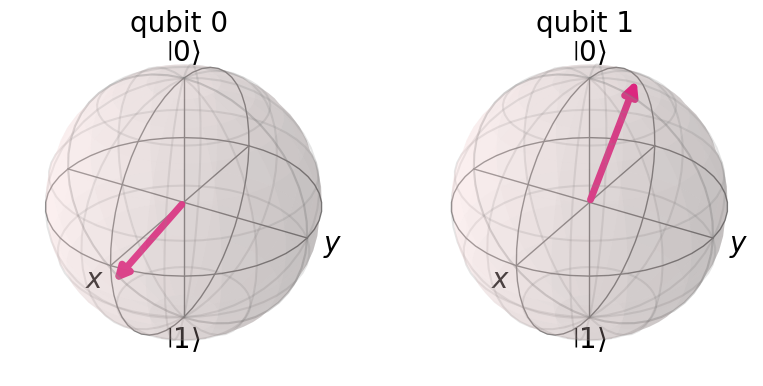

In [11]:
# Visualización en la esfera de Bloch
plot_bloch_multivector(statevector)

#### Explicación ejemplo
En este ejemplo, los datos clásicos a codificar se definen como una lista data. Se crea un circuito cuántico qc con el número de qubits necesario para representar todos los valores posibles en los datos. La cantidad de qubits necesarios se determina utilizando el logaritmo en base 2 del valor máximo en los datos.

Luego, se recorre la lista de datos y se calcula la fase correspondiente para cada valor utilizando la fórmula $ \frac{2 * pi * value}{2^{num_qubits}} $. Se aplica una compuerta de desplazamiento de fase p(phase, i) al qubit correspondiente.

Después de aplicar las transformaciones cuánticas, se simula el circuito cuántico utilizando el simulador statevector_simulator. Se obtiene el vector de estado resultante y se imprime en la salida.

La codificación por desplazamiento de fase permite representar una amplia gama de valores clásicos en un espacio cuántico, lo que puede ser útil en diversas aplicaciones, como el procesamiento de información y el aprendizaje automático cuántico.

**Referencias:**

1. Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information. Cambridge University Press.
2. Qiskit Documentation: [https://qiskit.org/documentation/](https://qiskit.org/documentation/)
3. Preskill, J. (2018). Quantum Computing in the NISQ era and beyond. Quantum, 2, 79.
4. Biamonte, J., et al. (2017). Quantum machine learning. Nature, 549(7671), 195-202.
5. Rodríguez-Rosario, C. A., et al. (2021). Introduction to Quantum Algorithms for Physics and Chemistry. CRC Press.
